In [1]:
import numpy as np
import matplotlib.pyplot as plt

(100, 1)


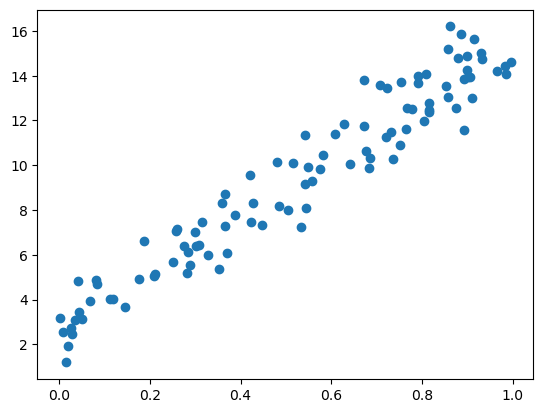

In [2]:
# underlying true function is y = 2x + 5
X = np.random.rand(100, 1)
noise = np.random.normal(size=(100, 1))
print(noise.shape)
y = 12 * X + 3 + noise

plt.scatter(X, y)

In [3]:
# we have two parameters, the slope and intercept
# so let's add a columns of 1s to our X

ones = np.ones(X.shape)
X = np.hstack([X, ones])
X.shape

(100, 2)

In [4]:
# then we use the normal equation to analytically solve for the parameters
theta = np.linalg.inv(X.T @ X) @ X.T @ y
theta

array([[12.68178941],
       [ 2.71635591]])

MSE = 1.08479
MAE = 0.84227


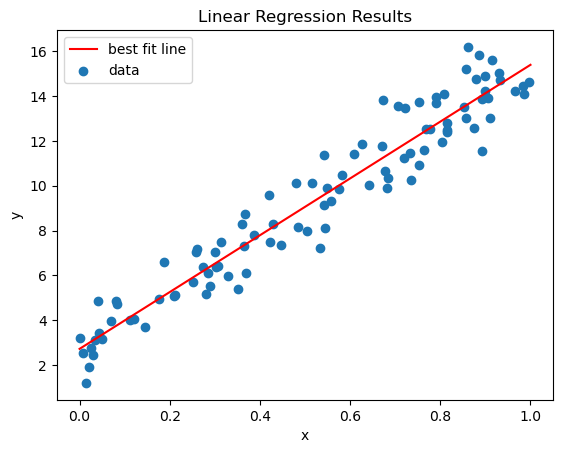

In [5]:
# visualize the line with the scatter plot
_x = np.linspace(0, 1, 100).reshape(-1, 1)
_x = np.hstack([_x, ones])

y_line = _x @ theta
y_pred = X @ theta
mse = np.sum((y_pred - y) ** 2) / len(y)
mae = np.sum(np.abs(y_pred - y)) / len(y)

print(f"MSE = {mse:.5f}")
print(f"MAE = {mae:.5f}")

plt.plot(_x[:, 0], y_line, 'r', label="best fit line")
plt.scatter(X[:, 0], y, label="data")
plt.title("Linear Regression Results")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## what happens when we have repeated features?

In [61]:
X = np.array([1, 2, 3])
X_2 = 2 * X + 3
X_3 = np.array([1, 1, 1])

def corr(X, Y):
    return X.T @ Y / (np.linalg.norm(X) * np.linalg.norm(Y))

corr(X, X_2)


0.9258200997725515

In [47]:
(0.32 * X).T @ X

array([[10.8608381]])

In [41]:
ones = np.ones(X.shape)
X = np.random.rand(100, 1)
repeated_X = np.hstack([X, 0.2 * X, ones])
repeated_X.shape

(100, 3)

In [42]:
def solve_ridge(X, y, lam):
    num_features = X.shape[1]
    theta = np.linalg.inv(X.T @ X + lam * np.eye(num_features)) @ X.T @ y
    return theta

def solve(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

theta1 = solve(repeated_X, y)
theta2 = solve_ridge(repeated_X, y, 0.001)
theta1, theta2

(array([[  3.56596571],
        [-10.05796179],
        [  9.87076745]]),
 array([[-0.78100339],
        [-0.15620068],
        [ 9.87027215]]))

MSE = 15.67642
MAE = 3.36084


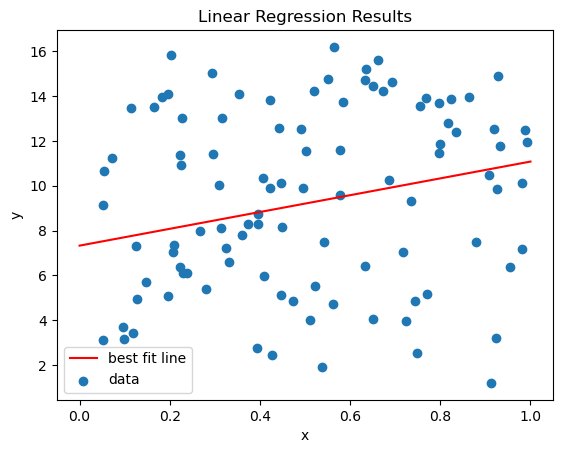

In [28]:
# visualize the line with the scatter plot
_x = np.linspace(0, 1, 100).reshape(-1, 1)
_x = np.hstack([_x, _x, ones])

y_line = _x @ theta
y_pred = repeated_X @ theta
mse = np.sum((y_pred - y) ** 2) / len(y)
mae = np.sum(np.abs(y_pred - y)) / len(y)

print(f"MSE = {mse:.5f}")
print(f"MAE = {mae:.5f}")

plt.plot(_x[:, 0], y_line, 'r', label="best fit line")
plt.scatter(X[:, 0], y, label="data")
plt.title("Linear Regression Results")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()